Using device: cuda:0
Classes: ['Cat', 'Dog']
CatDogVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Max

Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:53<00:00,  2.89it/s]


Train Loss: 0.1180, Train Acc: 0.9755
Test Loss: 0.0870, Test Acc: 0.9768
--------------------------------------------------
Epoch 2/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.01it/s]


Train Loss: 0.0334, Train Acc: 0.9911
Test Loss: 0.1181, Test Acc: 0.9796
--------------------------------------------------
Epoch 3/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:30<00:00,  5.03it/s]


Train Loss: 0.0468, Train Acc: 0.9898
Test Loss: 0.0608, Test Acc: 0.9840
--------------------------------------------------
Epoch 4/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.02it/s]


Train Loss: 0.0233, Train Acc: 0.9941
Test Loss: 0.1067, Test Acc: 0.9822
--------------------------------------------------
Epoch 5/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.03it/s]


Train Loss: 0.0232, Train Acc: 0.9946
Test Loss: 0.1371, Test Acc: 0.9828
--------------------------------------------------
Epoch 6/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.01it/s]


Train Loss: 0.0360, Train Acc: 0.9943
Test Loss: 0.2852, Test Acc: 0.9834
--------------------------------------------------
Epoch 7/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.02it/s]


Train Loss: 0.0721, Train Acc: 0.9932
Test Loss: 0.2172, Test Acc: 0.9828
--------------------------------------------------
Epoch 8/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.02it/s]


Train Loss: 0.0299, Train Acc: 0.9955
Test Loss: 0.1849, Test Acc: 0.9844
--------------------------------------------------
Epoch 9/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.00it/s]


Train Loss: 0.0173, Train Acc: 0.9971
Test Loss: 0.1391, Test Acc: 0.9862
--------------------------------------------------
Epoch 10/10


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 156/156 [00:31<00:00,  5.03it/s]


Train Loss: 0.0100, Train Acc: 0.9979
Test Loss: 0.1580, Test Acc: 0.9846
--------------------------------------------------


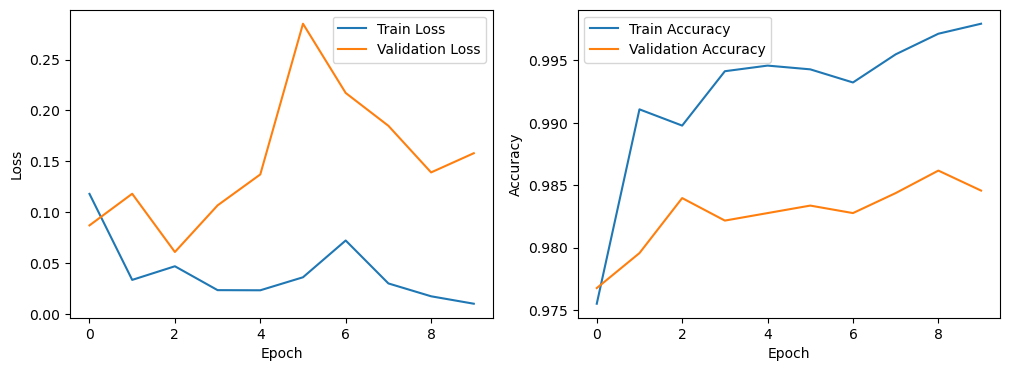

Model saved as vgg16_cat_dog_classifier.pth


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transforms for data preprocessing and augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 requires 224x224 input
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet stats
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Set paths
data_dir = "Pet_Images"

# Create datasets
full_dataset = ImageFolder(root=data_dir, transform=train_transform)

# Split dataset into train and test sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

# Apply different transform to test dataset
test_dataset.dataset.transform = test_transform

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get class names
class_names = full_dataset.classes
print(f"Classes: {class_names}")

# Display some sample images
def show_samples(dataloader, num_samples=4):
    images, labels = next(iter(dataloader))
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        # Denormalize images
        img = images[i].permute(1, 2, 0).cpu().numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Uncomment to show sample images
# show_samples(train_loader)

# Define the VGG16 transfer learning model
class CatDogVGG16(nn.Module):
    def __init__(self):
        super(CatDogVGG16, self).__init__()
        
        # Load pre-trained VGG16 model
        vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
        
        # Extract features portion (all convolutional layers)
        self.features = vgg16.features
        
        # Freeze the feature layers
        for param in self.features.parameters():
            param.requires_grad = False
        
        # Define new classifier layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 512),  # VGG16 outputs 512 feature maps of 7x7 size
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 2)  # 2 classes: cat and dog
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Create the model and move it to GPU
model = CatDogVGG16().to(device)
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)  # Only train the classifier

# Training function
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in tqdm(dataloader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct / total
    
    return epoch_loss, epoch_acc

# Evaluation function
def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct / total
    
    return epoch_loss, epoch_acc

# Training loop
num_epochs = 10
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Train
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Evaluate
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
    print("-" * 50)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), 'vgg16_cat_dog_classifier.pth')
print("Model saved as vgg16_cat_dog_classifier.pth")

# Function to make predictions on new images
def predict_image(image_path, model, transform):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        prob = torch.nn.functional.softmax(output, dim=1)[0][predicted.item()].item()
        return class_names[predicted.item()], prob

# Example of how to use the model for prediction
# Uncomment to use
# test_image_path = "Pet_Images/Cat/0.jpg"
# prediction, confidence = predict_image(test_image_path, model, test_transform)
# print(f"Prediction: {prediction}, Confidence: {confidence:.2f}")

# Display an image with prediction
def show_prediction(image_path, model, transform):
    # Make prediction
    prediction, confidence = predict_image(image_path, model, transform)
    
    # Load and display image
    image = Image.open(image_path).convert('RGB')
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Prediction: {prediction} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# Uncomment to show prediction for a specific image
# show_prediction("Pet_Images/Cat/0.jpg", model, test_transform)
# show_prediction("Pet_Images/Dog/0.jpg", model, test_transform)

# OPTIONAL: Fine-tune the model by unfreezing some layers
def fine_tune_model():
    # Unfreeze the last few layers of the VGG16 features
    for param in model.features[-4:].parameters():
        param.requires_grad = True
    
    # Use a smaller learning rate
    fine_tune_optimizer = optim.Adam([
        {'params': model.features[-4:].parameters(), 'lr': 0.0001},
        {'params': model.classifier.parameters(), 'lr': 0.001}
    ])
    
    # Fine-tune for a few more epochs
    # (You would repeat the training loop here with the new optimizer)
    print("Fine-tuning process would start here")

# Uncomment to run fine-tuning
# fine_tune_model()